# Cold gas phase

In [9]:
import os
from PIL import Image as Im
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/home/lera/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Запишем формулы (20) и (26), которыми мы будем пользоваться [из статьи](https://arxiv.org/pdf/0810.2556.pdf)

$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} pc^{-2}}\right) $$

Если $\Sigma_{gas} > \Sigma_{SO_4}$, то облать гравитационно нестабильна

In [10]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [11]:
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
Z =0.5

In [12]:
cold_phase = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)   

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


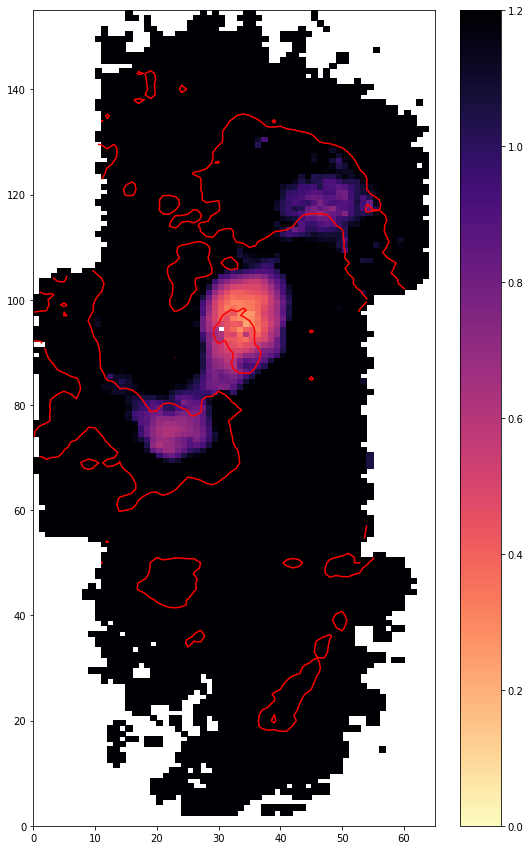

In [13]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax = 1.2)
plt.colorbar()

In [14]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0   

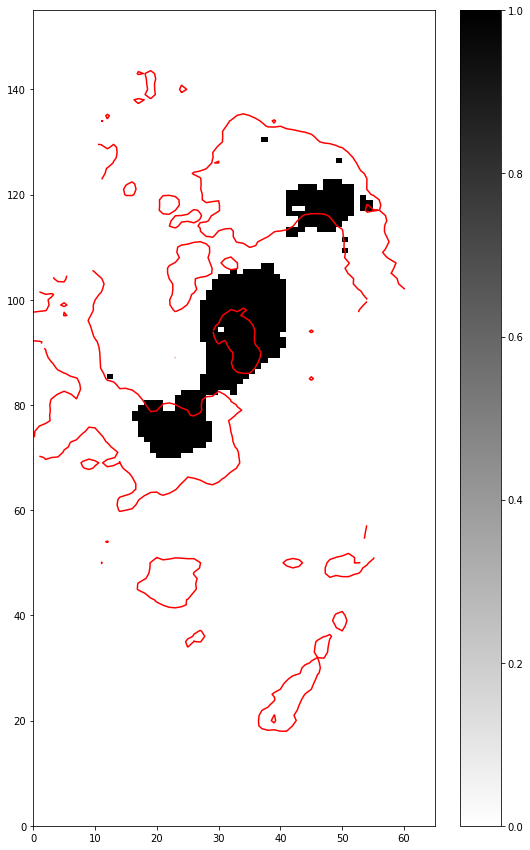

In [15]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

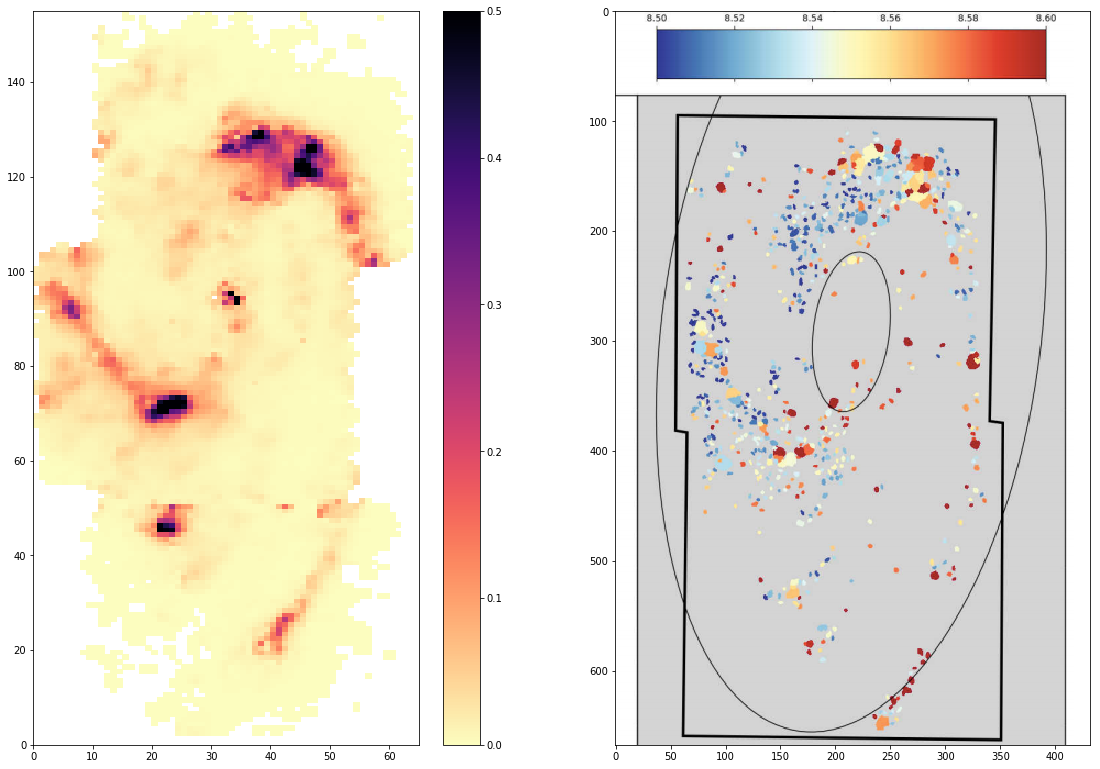

In [32]:
plt.figure(figsize=[19, 13.5])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, Sigma_SFR, cmap='magma_r')
quadmesh.set_clim(vmin=0.,vmax = 0.5)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Im.open('./images/metal.png'))
plt.show()

In [63]:
Z = np.zeros(dist_kpc.shape)
for i, row in enumerate(Sigma_SFR):
    for j, col in enumerate(Sigma_SFR[0]):
        if (Sigma_SFR[i][j]<0.035):
            Z[i][j] = 0.5
        if (0.035<= Sigma_SFR[i][j] < 0.12):
            Z[i][j] = 8.5    
        if (0.12<= Sigma_SFR[i][j] < 0.17):
            Z[i][j] = 8.52
        if (0.17 <= Sigma_SFR[i][j] < 0.22):
            Z[i][j] = 8.55    
        if (0.22 <= Sigma_SFR[i][j] < 0.4):
            Z[i][j] = 8.58
        if (0.4 <= Sigma_SFR[i][j]):
            Z[i][j] = 8.6         

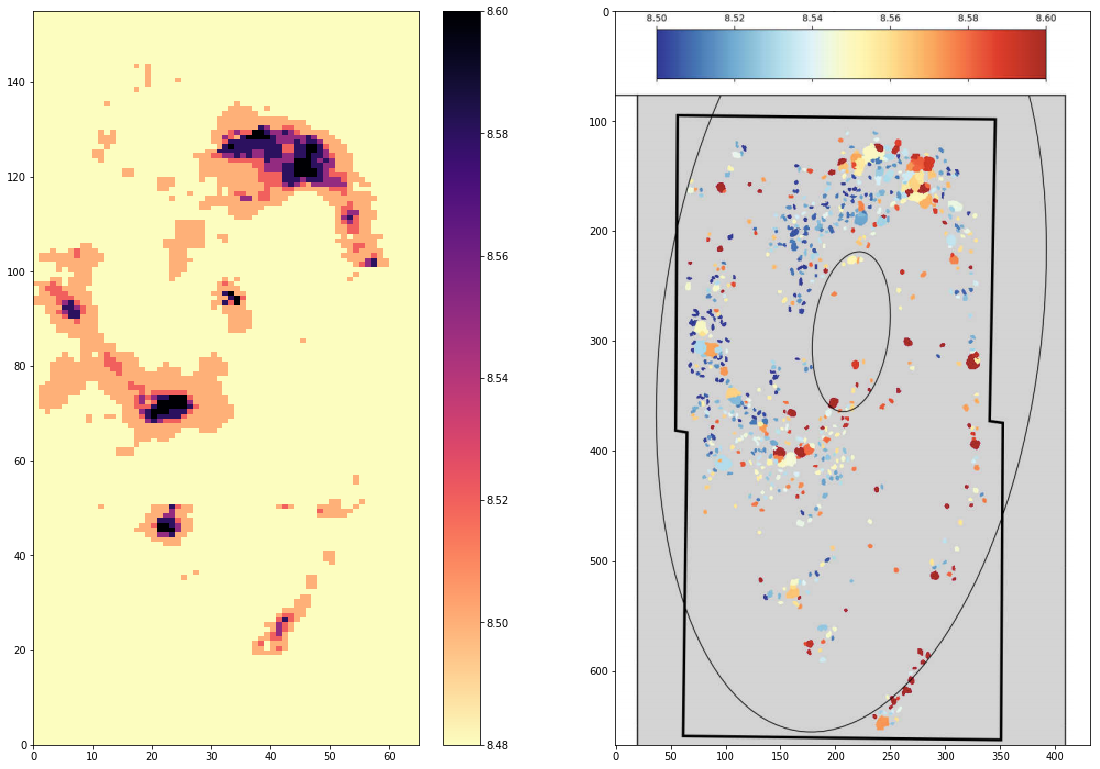

In [66]:
plt.figure(figsize=[19, 13.5])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, Z,cmap='magma_r')
quadmesh.set_clim(vmin=8.48,vmax = 8.6)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Im.open('./images/metal.png'))
plt.show()

In [67]:
cold_phase = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)   

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


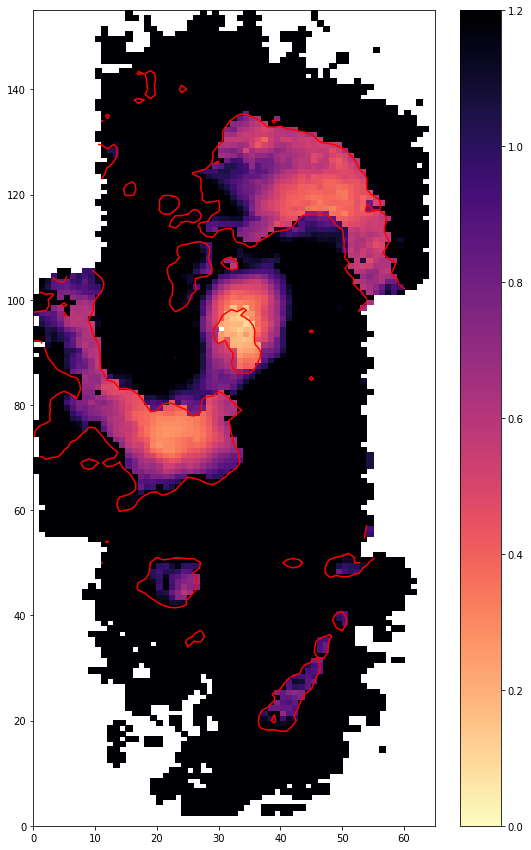

In [68]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax = 1.2)
plt.colorbar()

In [69]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0   

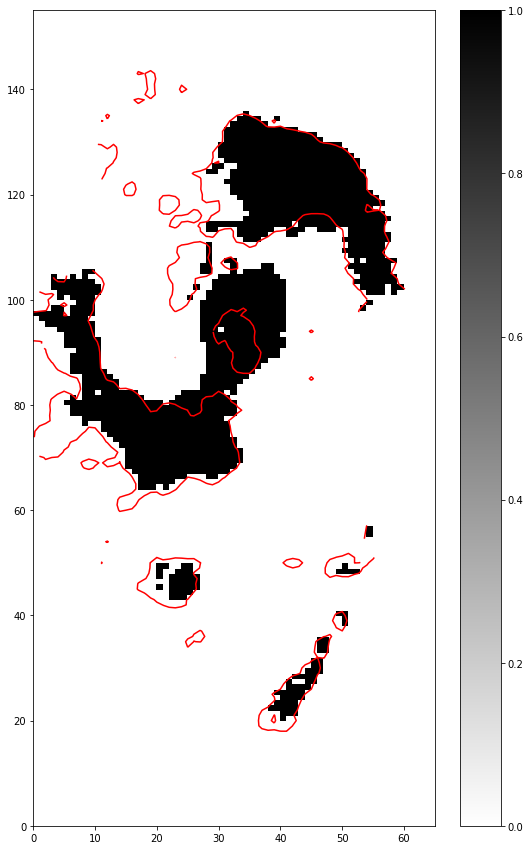

In [70]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()